In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
from nltk.corpus import stopwords

import time
from google_trans_new import google_translator  

## Distribution of main change words

In [18]:
csv_list = [
    'at_de_911',
    'cz_cs_911',
    'da_da_911',
    'de_de_911',
    'es_es_911',
    'nl_nl_911',
    'nz_en_911',
    'se_sv_911',
    'uk_en_911'
]
lang_dict = {
    'de':'german',
    'cs': None,
    'da': 'danish',
    'es': 'spanish',
    'nl': 'dutch',
    'en': 'english',
    'sv': 'swedish'
}

In [16]:
print(stopwords.fileids())

['arabic', 'azerbaijani', 'bengali', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish']


In [3]:
data_dict = {}
for i in csv_list:
    data = pd.read_csv(f'/Users/hubert/Drive/DPhil/Projects/2022-08a-Semantic_Change/semantic-change-hansard/data/02_intermediate/words_{i}.csv')
    data = data.sort_values(by='self', ascending=False)
    data_dict[i] = data

In [ ]:
for i in csv_list:
    f = plt.figure(figsize=(12, 6))
    sns.set_theme()
    chart = sns.barplot(
        data=data_dict[i],
        x = 'Unnamed: 0',
        y='self'
    )
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right');
    chart.set_xlabel('Word')
    chart.set_ylabel('Count')
    chart.set_title(f'Word Frequencies: {i}')
    f.savefig(os.path.join(f'/Users/hubert/Drive/DPhil/Projects/2022-08a-Semantic_Change/semantic-change-hansard/data/06_graphs/word_list_diagnostic', f'{i}.png'), bbox_inches='tight', dpi=300)


## Nearby words

In [35]:
for i in csv_list[4:]:
    print(f'\nProcessing {i}')
    temp = data_dict[i].sum(axis=0)[1:]
    temp = pd.DataFrame(temp).reset_index()
    temp.columns= ['word', 'count']
    temp = temp[temp['word'] != 'self']
    stopwords_for_lang = stopwords.words(lang_dict[i.split('_')[1]])
    print(f"{sum(temp['word'].isin(stopwords_for_lang))} words to remove that are stopwords")
    temp = temp[~temp['word'].isin(stopwords_for_lang)]
    temp = temp[temp['count']>10]
    print(f'Words left: {len(temp)}')
    translator = google_translator()
    try:
        temp['translated'] = temp['word'].apply(translator.translate)
    except:
        time.sleep(10)
        temp['translated'] = temp['word'].apply(translator.translate)
    temp = temp.sort_values(by='count', ascending=False)[:50]
    temp.to_csv(f'/Users/hubert/Drive/DPhil/Projects/2022-08a-Semantic_Change/semantic-change-hansard/data/02_intermediate/words_{i}_neighbours.csv')


Processing es_es_911
198 words to remove that are stopwords
Words left: 962


google_new_transError: 429 (Too Many Requests) from TTS API. Probable cause: Unknown

In [25]:
translator = google_translator()
temp['translated'] = temp['word'].apply(translator.translate)

,word,count,translated
89,wurde,113.0,became
532,wurden,109.0,became
431,bereits,105.0,already
448,beim,98.0,at the
104,nämlich,97.0,namely
1542,beziehungsweise,80.0,or
83,gerade,79.0,just
88,kommt,78.0,comes
308,zwei,77.0,two
287,mehr,77.0,more


In [ ]:
temp.describe()

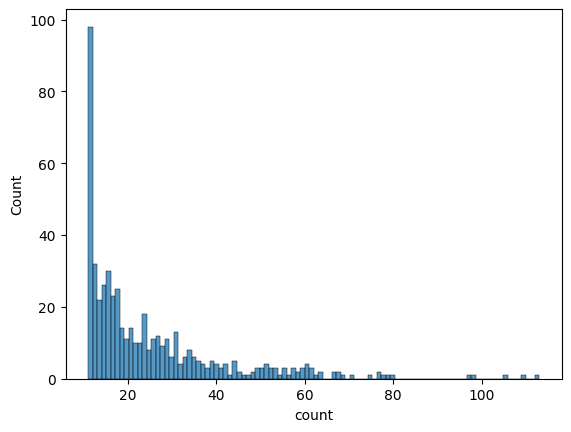

In [29]:
chart = sns.histplot(
    data = temp,
    x = 'count',
    bins=100
)

In [ ]:
for i in csv_list:
    f = plt.figure(figsize=(12, 6))
    sns.set_theme()
    chart = sns.barplot(
        data=data_dict[i].sum(axis=0)[1:],
    )
    # chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right');
    # chart.set_xlabel('Word')
    # chart.set_ylabel('Count')
    # chart.set_title(f'Word Frequencies: {i}')
    # f.savefig(os.path.join(f'/Users/hubert/Drive/DPhil/Projects/2022-08a-Semantic_Change/semantic-change-hansard/data/06_graphs/word_list_diagnostic', f'{i}.png'), bbox_inches='tight', dpi=300)

In [ ]:
x

In [ ]:
print(x.sort_values(ascending=False)[50:100])